<a href="https://colab.research.google.com/github/noellezeng/algorithmic-trading-python/blob/master/Tutorial_Intro_Computer_Vision_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#perform all the imports
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import os
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# New Section

In [ ]:
#read images from the training dataset together with its ground truth using cv2
##read one image from the training dataset together with its ground truth using cv2
ifolder = '/drive/MyDrive/CVDRIVE/DRIVE/training/images'
gfolder = '/drive/MyDrive/CVDRIVE/DRIVE/training/1st_manual'


(584, 565)
(584, 565)


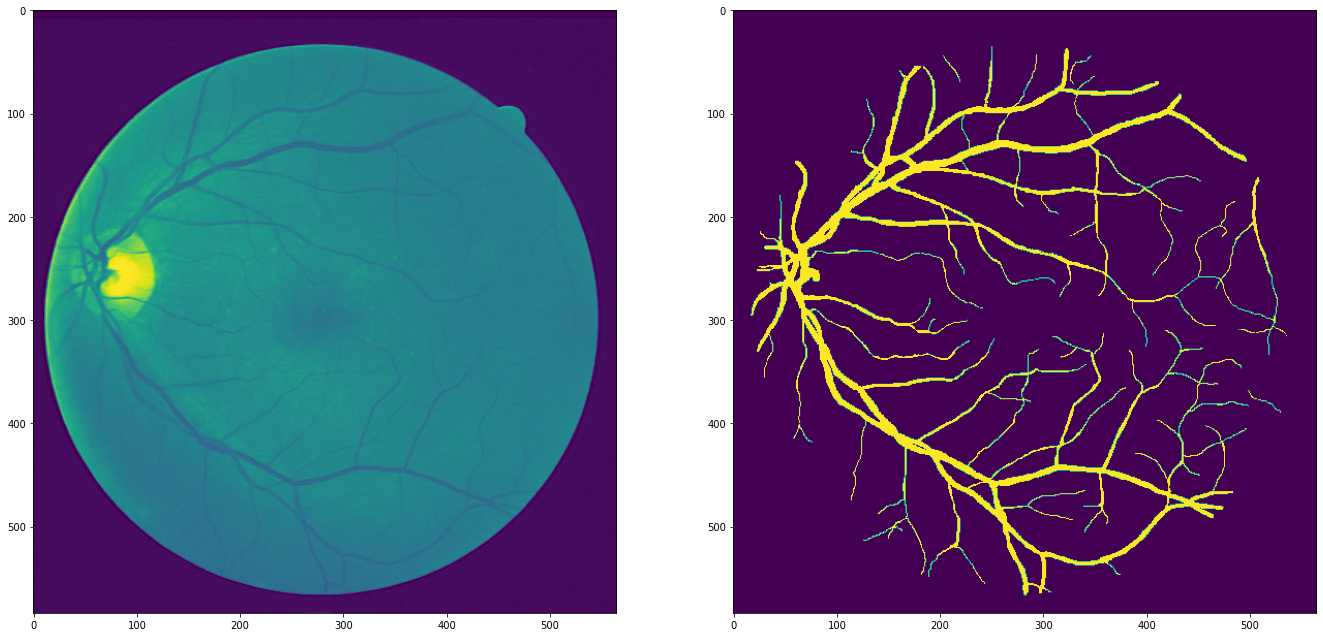

In [ ]:
def iread(fname, channels=1):
    # we are working on rgb so flip the last axis of cv2 images
    if channels == 1:
        return cv2.imread(os.path.join(ifolder,fname))[:,:,1]
    else: 
        return cv2.imread(os.path.join(ifolder,fname))[:,:,::-1]
def gread(fname, channels=1):
    channel = 'L' if channels == 1 else 'RGB'
    return np.array(Image.open(os.path.join(gfolder, fname)).convert(channel))

im = iread('21_training.tif',1)
gim = gread('21_manual1.gif')
print(im.shape)
print(gim.shape)
fig = plt.figure(figsize=(23,16))
plt.subplot(121),plt.imshow(im)
plt.subplot(122),plt.imshow(gim)
plt.show()


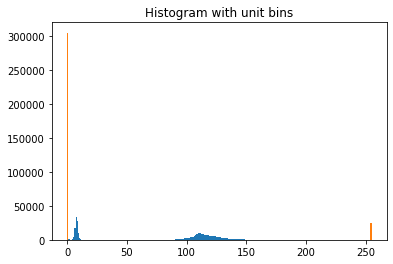

In [ ]:
#IMAGE PREPROCESSING, STATISTICS
#calculate statistics of the image in particular calculate the min, max, mean, std for the im, gim that you read before and print the histogram

########################ADD YOUR CODE HERE########################################
for i in [im,gim]: #doing it on the whole set

    imin=i.min()
    imax=i.max()
    imean=i.mean()
    imax=i.var()

#use format(i.flatten()) to make into an array

    plt.hist(i.flatten(),bins=range(256)) #arguments re passed to np.histogram
    plt.title('Histogram with unit bins')


##################################################################################


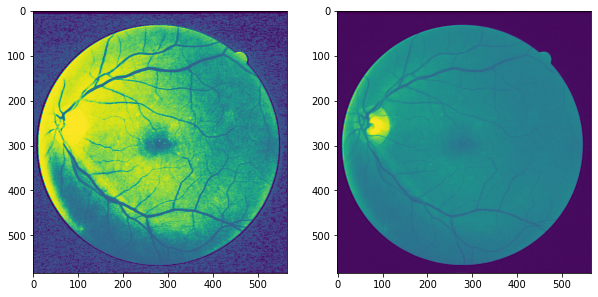

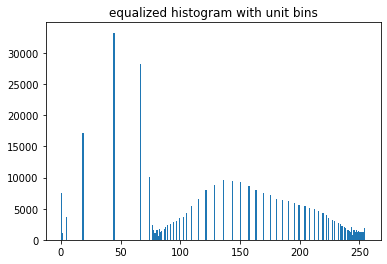

In [ ]:
#IMAGE PREPROCESSING, HISTOGRAM PROCESSING
########################ADD YOUR CODE HERE########################################
#Histogram Equalization Implement histogram equaization hint: use opencv
#two subplot to show them side to side; careful for the comma; number after sub indictes horizontal or vertical could only be 1 or 2
equ=cv2.equalizeHist(im)
fig=plt.figure(figsize=(10,8))
plt.subplot(122),plt.imshow(im)    
plt.subplot(121),plt.imshow(equ)
plt.show()

plt.hist(equ.flatten(),bins=range(256))
plt.title("equalized histogram with unit bins")
plt.show()
#Histogram Contrast Limited Adaptive Histogram Equalization (CLAHE) hint: use opencv

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))


##################################################################################

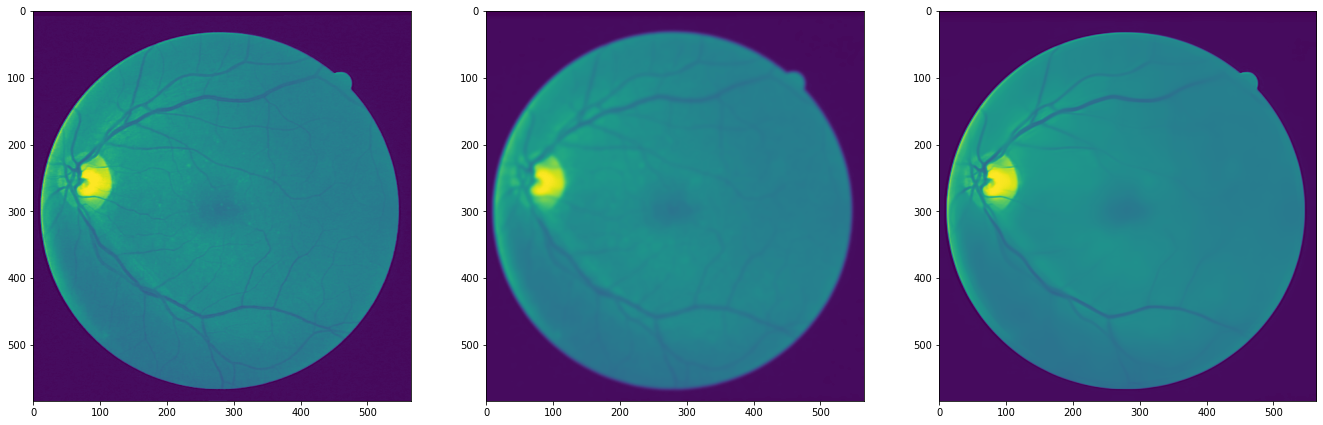

In [ ]:
#FILTERING, LOW PASS FILTERS/ SMOOTHING
#finding kernels with weights doing specific tasks susch as higlighting specific areas or smoothing
#main operation of convultion is a sum of weights(kernel) by the pixels of the image
########################
#Apply a Gaussian filter for smoothing the image hint: use opencv

gauss=cv2.getGaussianKernel(15,0) #this allows you to get the kernel rmb for size use odd number
im_blur=cv2.GaussianBlur(im,(15,15),0) #here use the blur function to smooth, arguments:(initial image, kernel size, sigma put 0 for self calculation)
                                       # the bigger the kernel the blurrer

#Apply a Non Local Mean Denoising filter for smoothing the image hint: use opencv

im_denoise = cv2.fastNlMeansDenoising(im,3,7,21) #arguments(initial im, filter strengh h usually 3, )

#plotting the figures
fig = plt.figure(figsize=(23,16))
plt.subplot(131),plt.imshow(im)
plt.subplot(132),plt.imshow(im_blur)

plt.subplot(133),plt.imshow(im_denoise)
plt.show()

##################################################################################
#to align the images use 121/122 for 2 images; 131/132/133 for 3 etc
#print the filtered images


In [ ]:
#help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .   
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .   
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are z

Help on built-in function Sobel:

Sobel(...)
    Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
    .   
    .   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
    .   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
    .   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
    .   or the second x- or y- derivatives.
    .   
    .   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
    .   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
    .   
    .   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
    .   
    .   for the x-derivative, or transposed for the y-derivative.
    . 

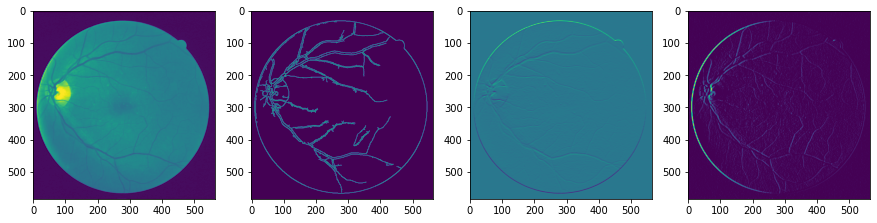

In [ ]:
#FILTERING, HIGH PASS FILTERS/ EDGE DETECTION
########################ADD YOUR CODE HERE########################################
#Apply a Canny filter for edge detection. Apply it on the original and dst images. What do you observe?
lower = 30
upper = 150

im_canny=cv2.Canny(im, lower, upper)

fig = plt.figure(figsize=(15,8))
plt.subplot(141),plt.imshow(im)
plt.subplot(142),plt.imshow(im_canny)


########################ADD YOUR CODE HERE########################################
#Apply a Sobel filter on the original image and print the result.
im_sobel_dy=cv2.Sobel(im,cv2.CV_64F,0,1, ksize = 3)#using y kernel to detect horizontal lines
im_sobel_dx=cv2.Sobel(im,cv2.CV_8U,1,0, ksize = 3)#usisng x kernel to detect vertical lines

plt.subplot(143),plt.imshow(im_sobel_dy)
plt.subplot(144),plt.imshow(im_sobel_dx)
#help(cv2.Sobel)
##################################################################################

(<matplotlib.axes._subplots.AxesSubplot at 0x7fab5f73fc10>,
 <matplotlib.image.AxesImage at 0x7fab61503790>)

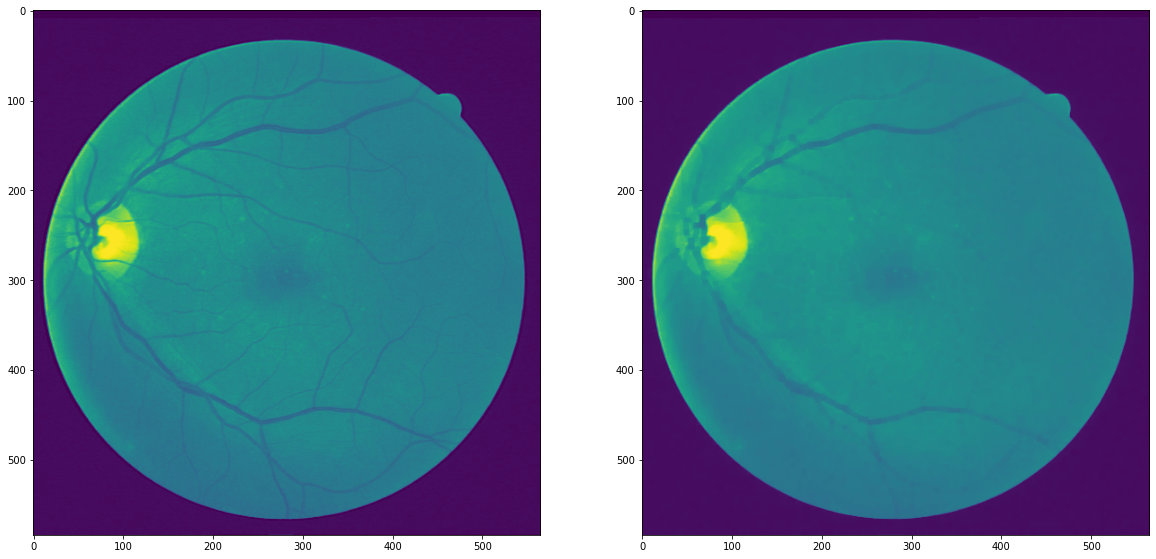

In [ ]:
#MORPHOLOGICAL FILTERING
########################ADD YOUR CODE HERE########################################
#Apply morphological closing for edge extraction. Apply it on the original and dst images.
kernel = np.ones((5,5))
im_closing = cv2.morphologyEx(im,3,kernel)

fig= plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(im)
plt.subplot(122),plt.imshow(im_closing)
#################################################################################
#Optional, apply the opening. What do you observe?
